In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [69]:
cols = ["carat", "cut", "color", "clarity", "depth", "table", "price", "xFrac", "yFrac", "zFrac"]

In [116]:
df = pd.read_csv(r"prepared_dataset.csv")
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0,Logitech M510 Wireless mouse,HP 63 Ink,HP 65 ink,nonda USB C to USB Adapter,10ft iPHone Charger Cable,HP 902XL ink,Creative Pebble 2.0 Speakers,Cleaning Gel Universal Dust Cleaner,Micro Center 32GB Memory card,...,TopMate C5 Laptop Cooler pad,Apple USB-C Charger cable,HyperX Cloud Stinger Headset,TONOR USB Gaming Microphone,Dust-Off Compressed Gas 2 pack,3A USB Type C Cable 3 pack 6FT,HOVAMP iPhone charger,SanDisk Ultra 128GB card,FEEL2NICE 5 pack 10ft Lighning cable,FEIYOLD Blue light Blocking Glasses
1,1,Apple Lightning to Digital AV Adapter,TP-Link AC1750 Smart WiFi Router,Apple Pencil,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,UNEN Mfi Certified 5-pack Lightning Cable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Cat8 Ethernet Cable,HP 65 ink,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Dust-Off Compressed Gas 2 pack,Screen Mom Screen Cleaner kit,Moread HDMI to VGA Adapter,HP 62XL Tri-Color ink,Apple USB-C Charger cable,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df.drop(0, inplace=True)


In [72]:
df=df.reset_index(drop=True)

In [73]:
df.head()

,carat,cut,color,clarity,depth,table,price,xFrac,yFrac,zFrac
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.2,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75


In [74]:
df['clarity'] = df['clarity'].astype(str).str.strip("b'")
df['cut'] = df['cut'].astype(str).str.strip("b'")
df['color'] = df['color'].astype(str).str.strip("b'")

In [75]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [76]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [77]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [78]:
cut_mapping = {'Ideal': 1, 'Premium': 2, 'Good': 3, 'Very Good': 4, 'Fair': 5}
color_mapping = {'E': 11, 'I': 12, 'J': 13, 'H': 14, 'F': 15, 'G': 16, 'D': 17}
clarity_mapping = {'SI2': 21, 'SI1': 22, 'VS1': 23, 'VS2': 24, 'VVS2': 25, 'VVS1': 26,
       'I1': 27, 'IF': 28}

In [79]:
df["cut"] = df["cut"].map(cut_mapping)
df["color"] = df["color"].map(color_mapping)
df["clarity"] = df["clarity"].map(clarity_mapping)

In [80]:
obj_cols = df.select_dtypes(include='object').columns.tolist()
for column in obj_cols:
    df[column] = df[column].astype(float)

In [81]:
df.describe()

,carat,cut,color,clarity,depth,table,price,xFrac,yFrac,zFrac
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.228940,14.174416,23.256136,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.265976,2.050156,1.766539,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,11.000000,21.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,1.000000,12.000000,22.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,15.000000,23.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,16.000000,24.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,17.000000,28.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   xFrac    53940 non-null  float64
 8   yFrac    53940 non-null  float64
 9   zFrac    53940 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 4.1 MB


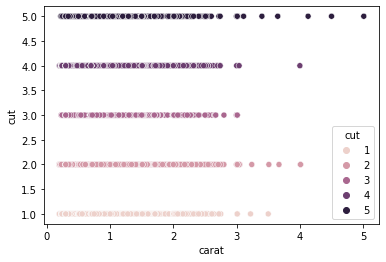

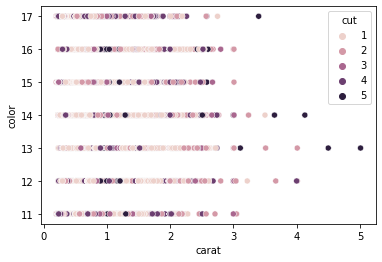

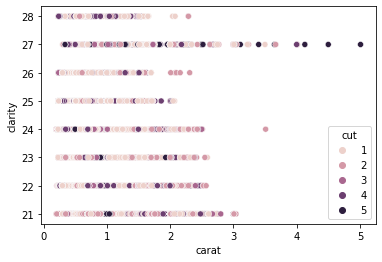

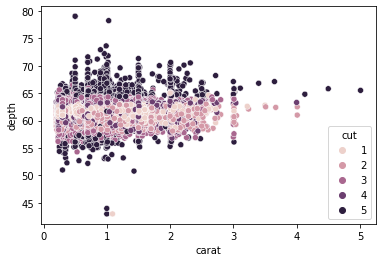

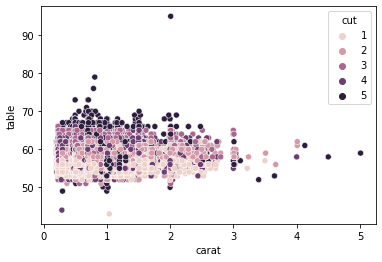

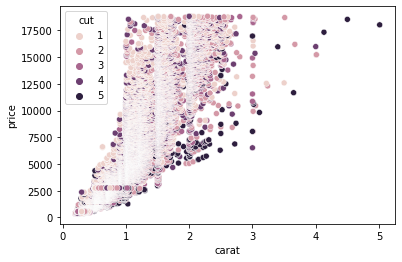

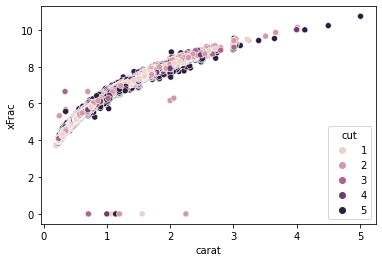

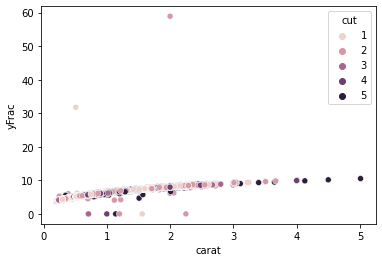

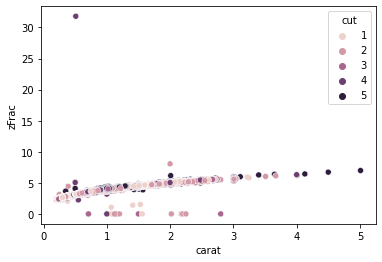

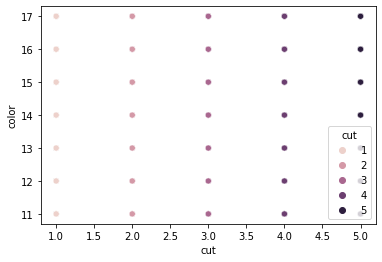

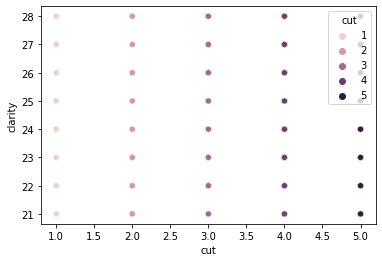

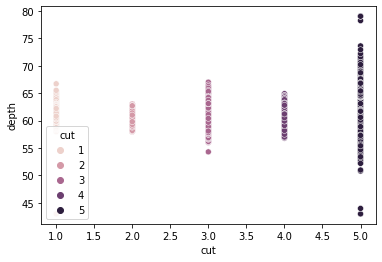

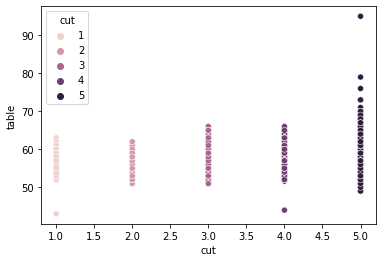

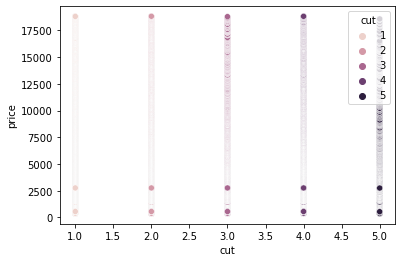

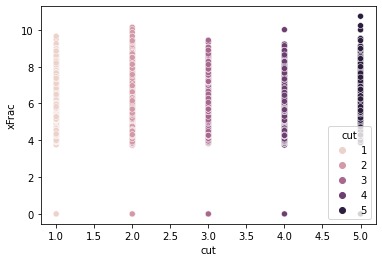

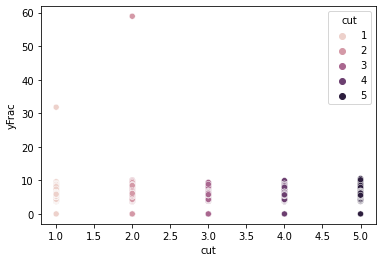

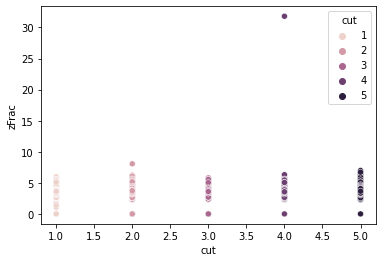

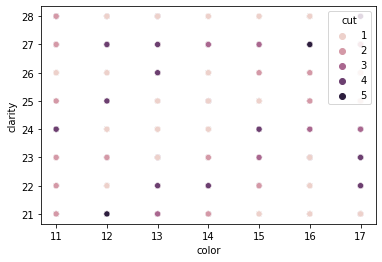

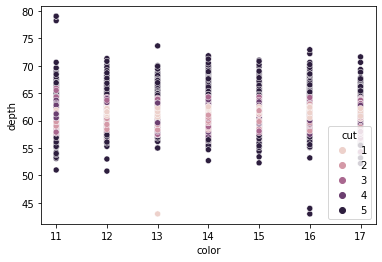

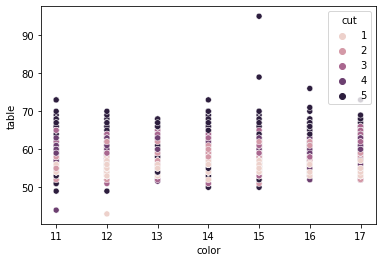

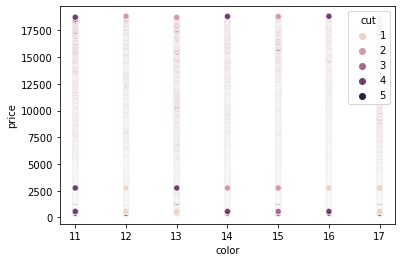

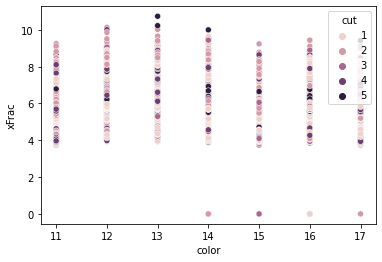

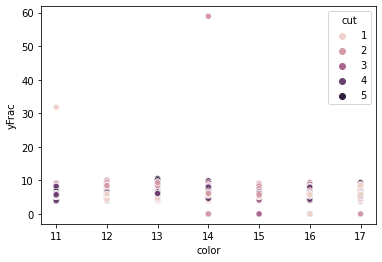

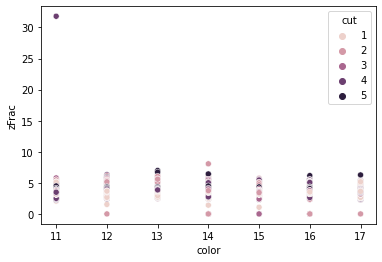

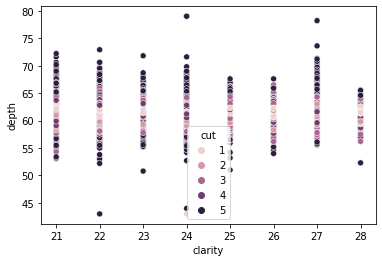

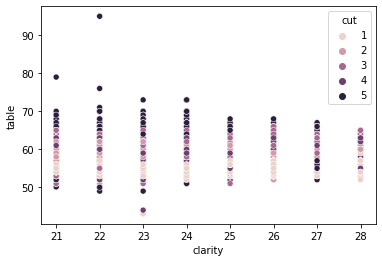

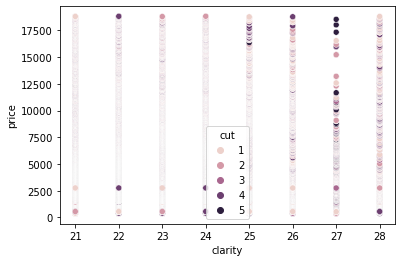

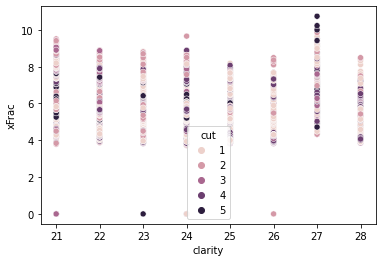

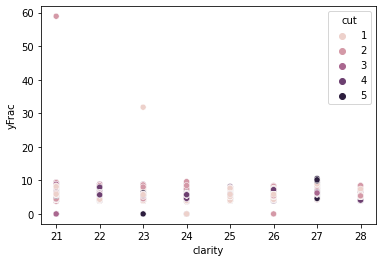

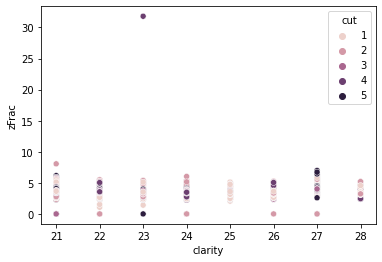

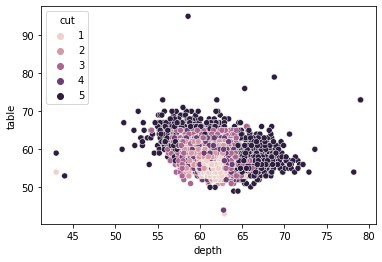

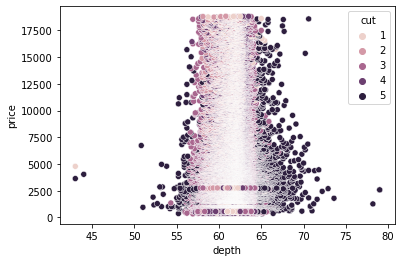

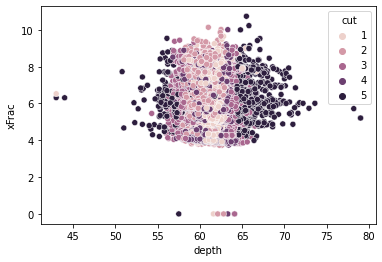

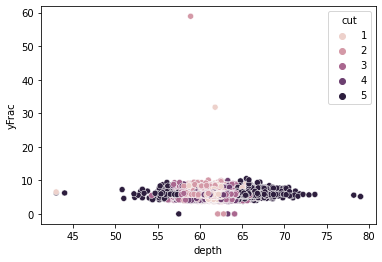

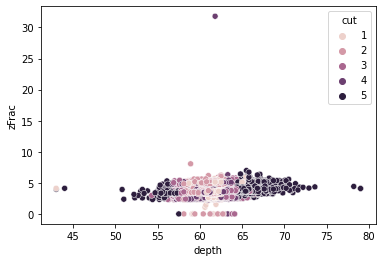

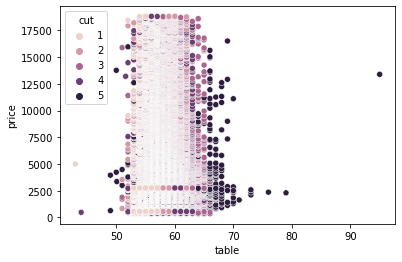

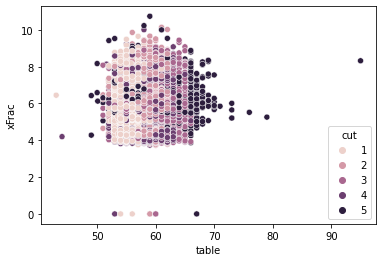

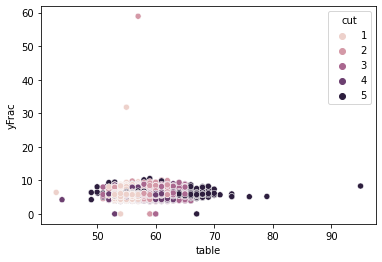

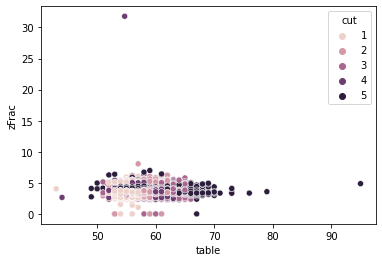

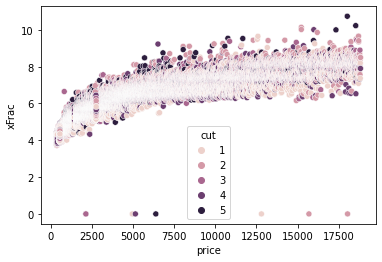

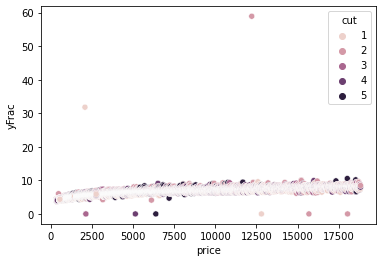

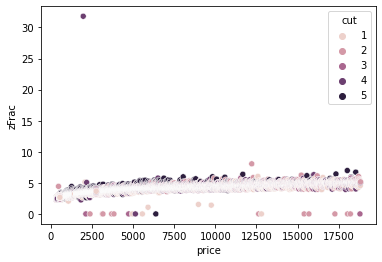

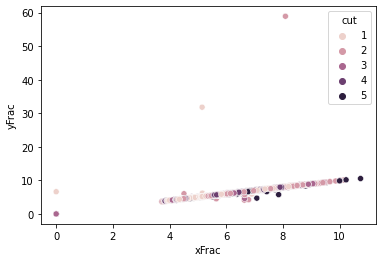

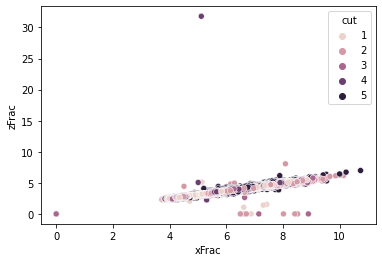

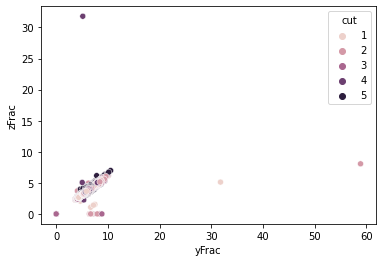

In [96]:
for i in range(len(cols)):
  for j in range(i+1, len(cols)):
    x_label = cols[i]
    y_label = cols[j]
    sns.scatterplot(x=x_label, y=y_label, data=df, hue='cut')
    plt.show()

In [83]:
from sklearn.cluster import KMeans

In [109]:
x = "table"
y = "xFrac"
X = df[[x, y]].values

In [110]:
kmeans = KMeans(n_clusters = 5).fit(X)

In [111]:
clusters = kmeans.labels_

In [112]:
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1, 1))), columns=[x, y, "cut"])

[]

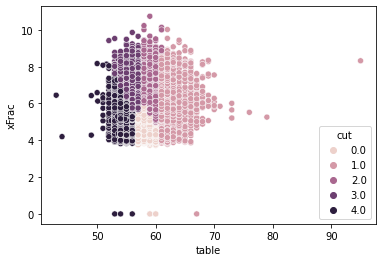

In [113]:
colors = ["red", "green", "blue"]
sns.scatterplot(x=x, y=y, hue='cut', data=cluster_df)
plt.plot()

[]

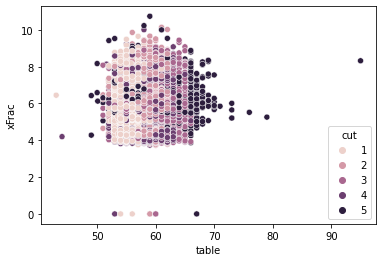

In [114]:
sns.scatterplot(x=x, y=y, hue='cut', data=df)
plt.plot()